In [1]:
%matplotlib widget
import os, sys, pandas as pd, numpy as np
import matplotlib.pyplot as plt
sys.path.append('../../')
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
import hts_misc as misc, hts_fitting as hts
from scipy.interpolate import interp1d

def hall2field(voltage, temperature, calibration=0.13419745, offset=None):
    if offset is None:
        offset = np.zeros_like(voltage)
    interpolator = interp1d([1.5, 4, 20, 80, 100, 200, 302], 1+np.array([-1.05, -0.7, -0.4, -0.09, -0.04, 0.05, 0])/100, kind='linear')
    temperature_error_correction = interpolator(temperature)
    return calibration*(voltage-offset)*temperature_error_correction

import default_style

savedir = '../figures/raw/'

## This is the test with a magnet

/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_92630/3326202368.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(hvtT, delim_whitespace=True, skiprows=1)


(0.0, 300.0)

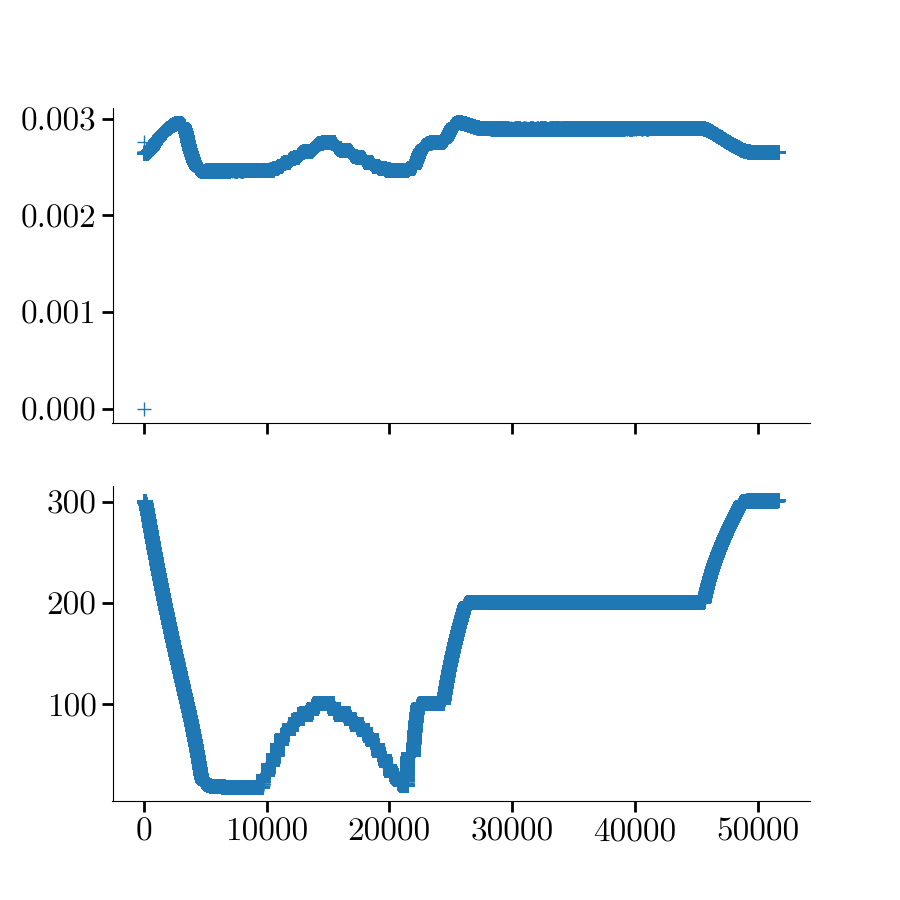

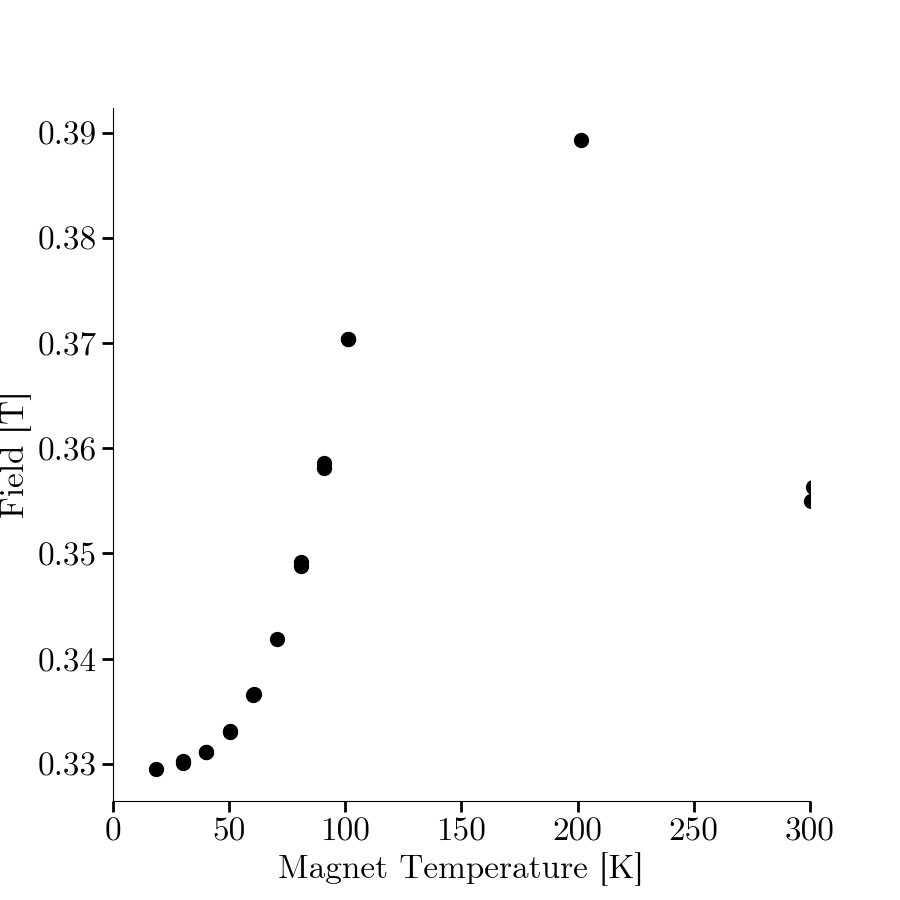

In [3]:
hvtT = 'Vt_2025-01-15_08-47-00286412_HvsT-450umSapphire-OnTape-HvsT-450umSapphire-onTape.txt'
data = pd.read_csv(hvtT, delim_whitespace=True, skiprows=1)
cut = data.iHTS_A > 0.090
data = data[cut]

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(data.t_s, data.vHTS_V, linestyle='None', marker='+')
ax[1].plot(data.t_s, data.tHOL_K, linestyle='None', marker='+')


limits = [(8200, 9600), (9850, 10050), (10250, 10450), (10625, 10800), (11070, 11140), (12250, 12450), (13350, 13600), (14900, 15300), (45, 75),
(16300, 16700), (17450, 17750), (18150, 18450), (18800, 18981), (19350, 19550), (19850, 19975), (20350, 20600), (23400, 24200), (34000, 44000), (50400, 51600)]

tavg, tstd, vavg, vstd = [], [], [], []
for limit in limits:
    cut_data = data[(limit[0] <= data.t_s)&(data.t_s <= limit[1])]
    tavg.append(cut_data.tHOL_K.mean())
    tstd.append(cut_data.tHOL_K.std())
    vavg.append(cut_data.vHTS_V.mean())
    vstd.append(cut_data.vHTS_V.std())

fig, ax = plt.subplots()

interpolator = interp1d(tavg, np.array(vavg)*1e3, kind='linear')
xsmooth = np.linspace(np.min(tavg), np.max(tavg), 300)
ysmooth = interpolator(xsmooth)

#ax.plot(xsmooth, hall2field(ysmooth, xsmooth), linestyle='--', color='k', zorder=0)
ax.errorbar(x=tavg, y=hall2field(np.array(vavg)*1e3, tavg), xerr=tstd, yerr=hall2field(np.array(vstd)*1e3, tavg), marker='o', mfc='k', mec='k', linestyle='None', color='k')

ax.set_ylabel('Field [T]')
ax.set_xlabel('Magnet Temperature [K]')
#ax.set_ylim(0.31, 0.38)
ax.set_xlim(0, 300)

#ax.plot(20, 0.96*0.13419745*interpolator(20), color='b', marker='*', markersize=10, zorder=1)

#I made a measurement the other day with the hall probe on top of the tape (minimum field along the thickness since the magnet is under 

## Figure

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_92630/244874497.py:6: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(tavg, hall2field(np.array(vavg)*1e3, tavg), marker='o', markersize=8, color='C0', linestyle='None', label='Indium (+5 $\mu$m)')


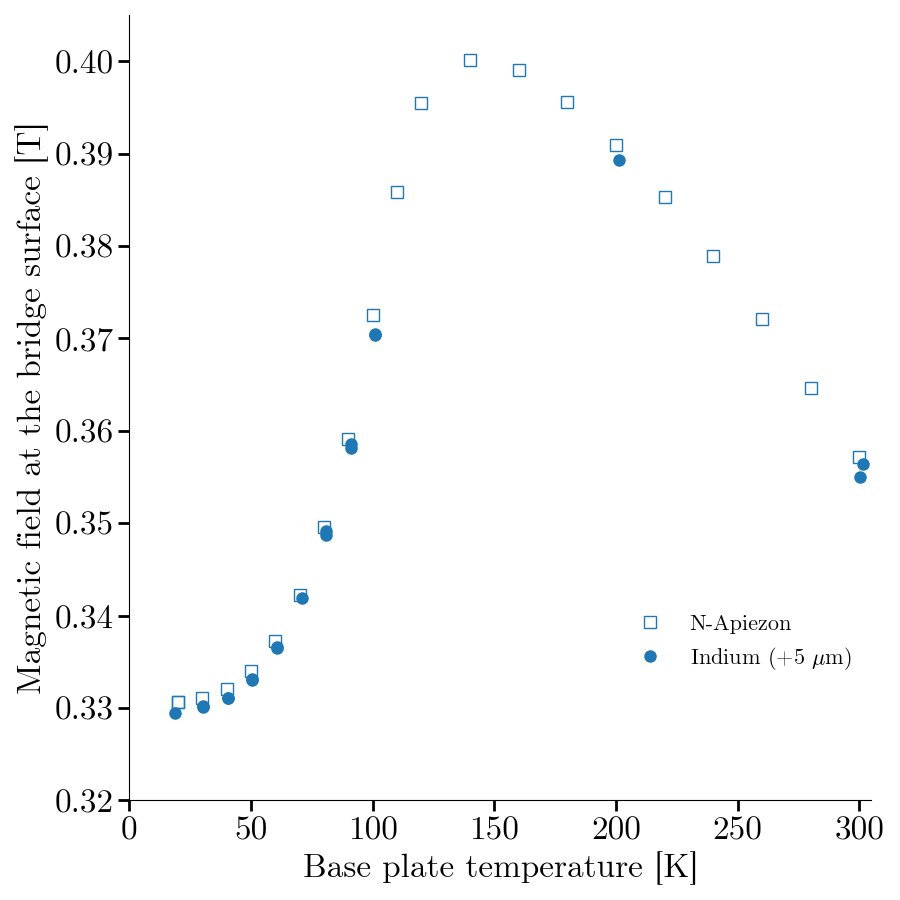

In [5]:
voltage = np.array([2.6614, 2.7170, 2.7721, 2.8226, 2.8696, 2.9115, 2.9466, 2.9735, 2.982, 2.9474, 2.8763, 2.7771, 2.6779, 2.6070, 2.5538, 2.5180, 2.4952, 2.4816, 2.4759, 2.4737, 2.4739])
temperature = np.array([300, 280, 260, 240, 220, 200, 180, 160, 140, 120, 110, 100, 90, 80, 70, 60, 50, 40.25, 30, 20.0, 19.9])
           
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(temperature, hall2field(voltage, temperature), marker='s', markersize=8, mec='C0', mfc='None', linestyle='None', label='N-Apiezon')
ax.plot(tavg, hall2field(np.array(vavg)*1e3, tavg), marker='o', markersize=8, color='C0', linestyle='None', label='Indium (+5 $\mu$m)')

ax.set_xlabel('Base plate temperature [K]')
ax.set_ylabel('Magnetic field at the bridge surface [T]')
ax.set_xlim(0, 305)
ax.set_ylim(0.32, 0.405)
ax.legend(loc='center right', frameon=False, bbox_to_anchor=(1, 0.20), fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()
#fig.savefig(savedir+'HvT_measured.svg', format='svg', transparent=True, dpi=300)